In [1]:
class Option():
    
    def __init__(self):

        self.dataroot= r'/home/jara/DeepInPainting/paris_original' #image dataroot
        self.validroot= r'/home/jara/DeepInPainting/paris_validation'
        self.validrefroot= r'/home/jara/DeepInPainting/paris_validation_ref'
        self.maskroot= r'/home/jara/DeepInPainting/mask/training_mask_dataset'
        self.refroot= r'/home/jara/DeepInPainting/paris_original_ref'   #ref dataroot
        self.batchSize= 1   # Need to be set to 1
        self.fineSize=256 # image size
        self.input_nc=3  # input channel size for first stage
        self.input_nc_g=6 # input channel size for second stage
        self.output_nc=3# output channel size
        self.ngf=64 # inner channel
        self.ndf=64# inner channel
        self.which_model_netD='basic' # patch discriminator
        self.which_model_netF='feature'# feature patch discriminator
        self.which_model_netG='unet_ipsr'# second stage network
        self.which_model_netP='unet_256'# first stage network
        self.triple_weight=1
        self.name='IPSR_inpainting'
        self.n_layers_D='3' # network depth
        self.gpu_ids=[0]    # use gpu_id 1
        self.model='ipsr_net'
        self.checkpoints_dir=r'/home/jara/DeepInPainting/checkpoints' #
        self.norm='instance'
        self.fixed_mask=1
        self.use_dropout=True
        self.init_type='normal'
        self.mask_type='random'
        self.lambda_A=100
        self.threshold=5/16.0
        self.stride=1
        self.shift_sz=1 # size of feature patch
        self.mask_thred=1
        self.bottleneck=512
        self.gp_lambda=10.0
        self.ncritic=5
        self.constrain='MSE'
        self.strength=1
        self.init_gain=0.02
        self.cosis=1
        self.gan_type='lsgan'
        self.gan_weight=0.2
        self.overlap=4
        self.skip=0
        self.display_freq=1000
        self.print_freq=50
        self.save_latest_freq=5000
        self.save_epoch_freq=1
        self.continue_train=True
        self.epoch_count=33
        self.phase='train'
        self.which_epoch=33
        self.niter=20
        self.niter_decay=100
        self.beta1=0.5
        self.lr=0.0002
        self.lr_policy='lambda'
        self.lr_decay_iters=50
        self.isTrain=True

In [2]:
import time
from util.data_load import Data_load
from util.ref_data_load import Ref_Data_load
from models.models import create_model
import torch
import os
import torchvision
from torch.utils import data
import torchvision.transforms as transforms
import numpy as np
from models.Early import EarlyStopping
import matplotlib.pyplot as plt
opt = Option()
transform_mask = transforms.Compose(
    [transforms.Resize((opt.fineSize,opt.fineSize)),
     transforms.ToTensor(),
    ])
transform_ref = transforms.Compose(
    [transforms.Resize((opt.fineSize,opt.fineSize)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
transform = transforms.Compose(
    [transforms.RandomResizedCrop((opt.fineSize,opt.fineSize),scale=(0.8,1.0),ratio=(1,1)),
     transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1,hue=0.1),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])

transform_valid_ref = transforms.Compose(
    [transforms.Resize((opt.fineSize,opt.fineSize)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
transform_valid = transforms.Compose(
    [transforms.RandomResizedCrop((opt.fineSize,opt.fineSize),scale=(0.8,1.0),ratio=(1,1)),
     transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1,hue=0.1),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])

dataset_train = Data_load(opt.dataroot, opt.maskroot, opt.refroot, transform, transform_mask, transform_ref)

iterator_train = (data.DataLoader(dataset_train, batch_size=opt.batchSize, shuffle=True))

valid_dataset_train = Ref_Data_load(opt.validroot, opt.maskroot, opt.validrefroot, transform_valid, transform_mask, transform_valid_ref)
valid_iterator_train = (data.DataLoader(valid_dataset_train, batch_size=opt.batchSize, shuffle=True))

print(len(dataset_train))

model = create_model(opt)
total_steps = 0

10000
ipsr_net
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
Loading pre-trained network!
---------- Networks initialized -------------
UnetGeneratorIPSR(
  (model): UnetSkipConnectionBlock_3(
    (model): Sequential(
      (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): UnetSkipConnectionBlock_3(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace=True)
          (1): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), dilation=(2, 2))
          (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (3): LeakyReLU(negative_slope=0.2, inplace=True)
          (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (6): UnetSkipConnectionBlock_3(
            (model): S

Epoch : 33 -> Train loss : 9.613492, Valid loss : 8.930990
learning rate = 0.0001703
Epoch : 34 -> Train loss : 9.509675, Valid loss : 8.886846
learning rate = 0.0001683
Epoch : 35 -> Train loss : 9.434406, Valid loss : 8.668325
learning rate = 0.0001663
Epoch : 36 -> Train loss : 9.600284, Valid loss : 8.971414
learning rate = 0.0001644
Epoch : 37 -> Train loss : 9.608516, Valid loss : 9.035809
learning rate = 0.0001624
Epoch : 38 -> Train loss : 9.436318, Valid loss : 8.604560
learning rate = 0.0001604
Epoch : 39 -> Train loss : 9.478157, Valid loss : 8.766409
learning rate = 0.0001584
Epoch : 40 -> Train loss : 9.405002, Valid loss : 8.892253
learning rate = 0.0001564
Epoch : 41 -> Train loss : 9.498914, Valid loss : 8.449863
learning rate = 0.0001545
Epoch : 42 -> Train loss : 9.433967, Valid loss : 9.255931
learning rate = 0.0001525
Epoch : 43 -> Train loss : 9.406740, Valid loss : 8.797884
learning rate = 0.0001505
Epoch : 44 -> Train loss : 9.323506, Valid loss : 8.826476
learni

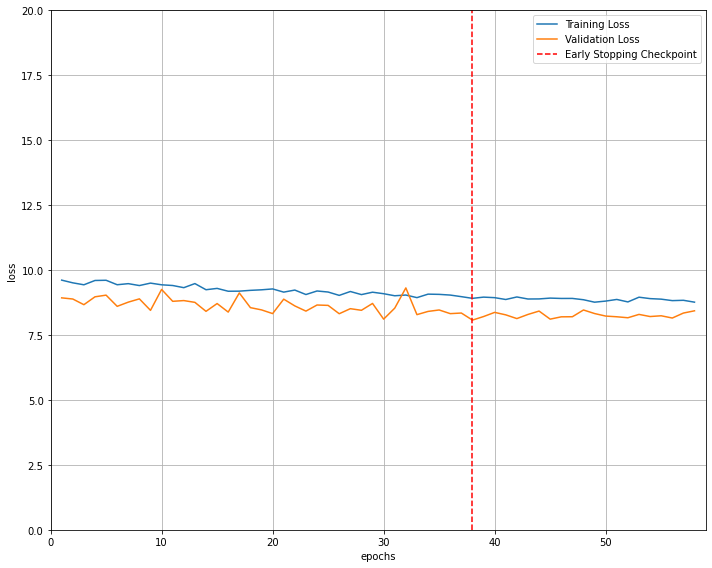

In [3]:
iter_start_time = time.time()
early=EarlyStopping(20)

train_loss=[]
valid_loss=[]
for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    t_loss=[]
    v_loss=[]
    
    epoch_start_time = time.time()
    epoch_iter = 0
        
    for image, mask, ref in (iterator_train):
        image=image.cuda()
        mask=mask.cuda()
        mask=mask[0][0]
        mask=torch.unsqueeze(mask,0)
        mask=torch.unsqueeze(mask,1)
        mask=mask.bool()

        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        
        model.set_input(image,mask,ref) # it not only sets the input data with mask, but also sets the latent mask.
        model.set_ref_latent()
        model.set_gt_latent()
        model.optimize_parameters() # update parameters
        
        tl=model.get_loss().get('GAN')
        t_loss.append(tl)
        
        if total_steps %opt.display_freq== 0:
            real_A,real_Ref,fake_B,fake_P,real_B=model.get_current_visuals()
            pic = (torch.cat([real_A,real_Ref,fake_P,fake_B], dim=0) + 1) / 2.0
            torchvision.utils.save_image(pic, '%s/Epoch_(%d)_(%dof%d).jpg' % (
            r'/home/jara/DeepInPainting/saveimg', epoch, total_steps + 1, len(dataset_train)), nrow=2)
    

    model.save(epoch)    
        
    for image, mask, ref in (valid_iterator_train):
        image=image.cuda()
        mask=mask.cuda()
        mask=mask[0][0]
        mask=torch.unsqueeze(mask,0)
        mask=torch.unsqueeze(mask,1)
        mask=mask.bool()
      
        model.set_input(image,mask,ref) # it not only sets the input data with mask, but also sets the latent mask.
        model.set_ref_latent()
        model.set_gt_latent()
        model.test()
        vl=model.get_loss().get('GAN')
        v_loss.append(vl)
        
    train_result_loss=np.average(t_loss)
    valid_result_loss=np.average(v_loss)
    
    train_loss.append(train_result_loss)
    valid_loss.append(valid_result_loss)
    
    print('Epoch : %d -> Train loss : %f, Valid loss : %f' %
            (epoch, train_result_loss, valid_result_loss))      
    
    early(valid_result_loss)
    if early.early_stop:
        print("Early stopping")
        break

    model.update_learning_rate()

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 20) 
plt.xlim(0, len(train_loss)+1) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')